In [93]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams.update({'figure.autolayout': True})

In [8]:
# Read the results of all the experiments.
xxs = pd.read_csv('cenlab-xxs-log.txt')
xy = pd.read_csv('cenlab-xy-log.txt')
idx = pd.read_csv('cenlab-index.csv')
matches = pd.read_csv('cenlab-txtmatcher-log.txt')
classical = pd.read_csv('classical-log.txt')

# Merge all the results and the index. 
df = pd.merge(idx, matches, on='filename', how='outer')
df = pd.merge(df, xxs, on='filename', how='outer')
df = pd.merge(df, xy, on='filename', how='outer')
df = pd.merge(df, classical, on='filename', how='outer')

In [9]:
# Get rid of unnecessary columns. 
for column in ['Unnamed: 0', 'threshold', 'ngrams']: 
    df.drop(column, axis=1, inplace=True)
    
df = df.fillna(0) # Missing values means a value of zero. 
df['xxs-ratio'] = ( df['xxs'] / df['words'] ) 

# Adjust for text word count.
df['matches-ratio'] = ( df['score'] / df['words'] ) 
df['xy-ratio'] = df['xy'] # XY is already a ratio. 
df['clas-ratio'] = df['classical'] / df['words'] 

# Organize by date. 
df = df.sort_values(by='date').set_index('date')

In [10]:
# Remove outliers. 
xyOutliers = df.loc[df['xy']>100]
xxsOutliers = df.loc[df['xxs']>10]
clasOutliers = df.loc[df['classical']>150]

dfb = df.loc[df['xy']<90]
dfb = dfb.loc[dfb['xxs']<10]
dfb = dfb.loc[dfb['classical']<150]

In [5]:
xyOutliers

,author,filename,gender,nationality,title,words,score,xxs,xy,classical,xxs-ratio,matches-ratio,xy-ratio,clas-ratio
date,,,,,,,,,,,,,,
1786,William Beckford,1786_Beckford_William_Vathek_Novel.txt,m,b,Vathek,36089.0,0.0,0.0,127.0,1,0.000000,0.000000,127.0,0.000028
1838,Harriet Martineau,1838_Martineau_Harriet_Deerbrook_Novel.txt,f,b,Deerbrook,220828.0,0.0,1.0,232.0,1,0.000005,0.000000,232.0,0.000005
1843,George Borrow,1843_Borrow_George_TheBibleinSpain_Novel.txt,m,b,The Bible in Spain,220514.0,3.0,0.0,1052.0,12,0.000000,0.000014,1052.0,0.000054
1847,Charlotte Bronte,1847_Bronte_Charlotte_JaneEyre_Novel.txt,f,b,Jane Eyre,184441.0,8.0,0.0,190.0,6,0.000000,0.000043,190.0,0.000033
1862,George Eliot,1862_Eliot_George_Romola_Novel.txt,f,b,Romola,226661.0,3.0,0.0,562.0,87,0.000000,0.000013,562.0,0.000384
1918,Sinclai Lewis,1918_Lewis_Sinclai_TheJob_Nove.txt,m,a,The Job,90518.0,0.0,1.0,127.0,2,0.000011,0.000000,127.0,0.000022


In [ ]:
xxsOutliers

In [77]:
clasOutliers

,author,filename,gender,nationality,title,words,modernist,score,xxs,xy,classical,xxs-ratio,matches-ratio,xy-ratio,clas-ratio
date,,,,,,,,,,,,,,,
1836,Lydia Child,1836_Child_Lydia_Philothea_Novel.txt,f,a,Philothea,73040.0,n,1.0,1.0,4.387597,410,0.000014,0.000014,4.387597,0.005613
1853,Charles Kingsley,1853_Kingsley_Charles_Hypatia_Novel.txt,m,b,Hypatia,162593.0,n,6.0,8.0,1.222785,277,0.000049,0.000037,1.222785,0.001704
1904,Edith Nesbit,1904 the phoenix and the carpet.txt,f,b,The Phoenix and the Carpet,62117.0,n,0.0,0.0,0.346405,375,0.000000,0.000000,0.346405,0.006037


In [ ]:
df['xy-ratio'].max(), df['xxs-ratio'].max(), df['matches-ratio'].max()

In [125]:
df['biblical'] = ( df['matches-ratio'] + df['xxs-ratio'] + df['xy-ratio'] ) / 3
dfb['biblical'] = ( dfb['matches-ratio'] + dfb['xxs-ratio'] + dfb['xy-ratio'] ) / 3

In [202]:
df.sort_values(by='biblical', ascending=False)

,author,filename,gender,nationality,title,words,modernist,score,xxs,xy,classical,xxs-ratio,matches-ratio,xy-ratio,clas-ratio,biblical
date,,,,,,,,,,,,,,,,
1843,George Borrow,1843_Borrow_George_TheBibleinSpain_Novel.txt,m,b,The Bible in Spain,220514.0,n,3.0,0.0,1052.000000,12,0.000000,0.113128,1.000000,0.009014,1.000000
1862,George Eliot,1862_Eliot_George_Romola_Novel.txt,f,b,Romola,226661.0,n,3.0,0.0,562.000000,87,0.000000,0.110060,0.534221,0.063580,0.534221
1838,Harriet Martineau,1838_Martineau_Harriet_Deerbrook_Novel.txt,f,b,Deerbrook,220828.0,n,0.0,1.0,232.000000,1,0.010228,0.000000,0.220532,0.000750,0.220532
1847,Charlotte Bronte,1847_Bronte_Charlotte_JaneEyre_Novel.txt,f,b,Jane Eyre,184441.0,n,8.0,0.0,190.000000,6,0.000000,0.360675,0.180608,0.005389,0.180608
1918,Sinclair Lewis,1918_Lewis_Sinclai_TheJob_Nove.txt,m,a,The Job,90518.0,n,0.0,1.0,127.000000,2,0.024953,0.000000,0.120722,0.003660,0.120722
1786,William Beckford,1786_Beckford_William_Vathek_Novel.txt,m,b,Vathek,36089.0,n,0.0,0.0,127.000000,1,0.000000,0.000000,0.120722,0.004590,0.120722
1848,Ann Bronte,1848_Bronte_Ann_TheTenantofWildfellHall_Novel.txt,f,b,The Tenant of Wildfell Hall,164513.0,n,11.0,0.0,99.000000,5,0.000000,0.556001,0.094106,0.005034,0.094107
1885,Amelia Barr,1885_Barr_Amelia_JanVeeder'sWife_Novel.txt,f,b,Jan Veeder's Wife,64733.0,n,4.0,0.0,84.000000,1,0.000000,0.513828,0.079848,0.002559,0.079848
1890,Kate Chopin,1890_Chopin_Kate_AtFault_Novel.txt,f,a,At Fault,57557.0,n,0.0,0.0,84.000000,1,0.000000,0.000000,0.079848,0.002878,0.079848


In [17]:
# Normalize data
def normalize(df): 
    for column in ['xy-ratio', 'matches-ratio', 'xxs-ratio', 'clas-ratio', 'biblical']: 
        df[column] = df[column] / ( df[column].max() )
        
#normalize(df)
#normalize(dfb)

In [ ]:
df['xy-ratio'].max(), df['xxs-ratio'].max(), df['matches-ratio'].max()

In [ ]:
dfb.loc[dfb['xy'] == dfb['xy'].max()]

In [ ]:
df

In [159]:
def plotGroup(df, columns, smoothing=2, save=False, filename=False): 
    if smoothing: 
        grouped = df.groupby((df.index//smoothing)*smoothing).mean()
        normalize(grouped)
        ax = grouped[columns].plot(kind='bar')
    else: 
        ax = df[columns].plot()
    if save: 
        fig = ax.get_figure()
        if not filename: 
            filename = 'charts/' + '_'.join(columns) + '.png'
        else: 
            filename = 'charts/' + filename + '.png'
        fig.savefig(filename)

/usr/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


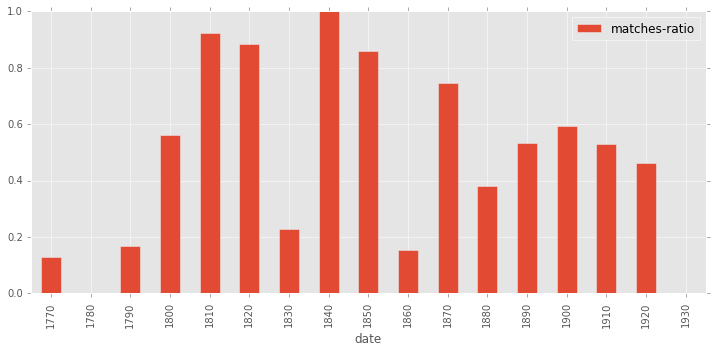

In [162]:
plotGroup(dfb, ['matches-ratio'], 10, save=True, filename='matches-dfb-10')

/usr/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


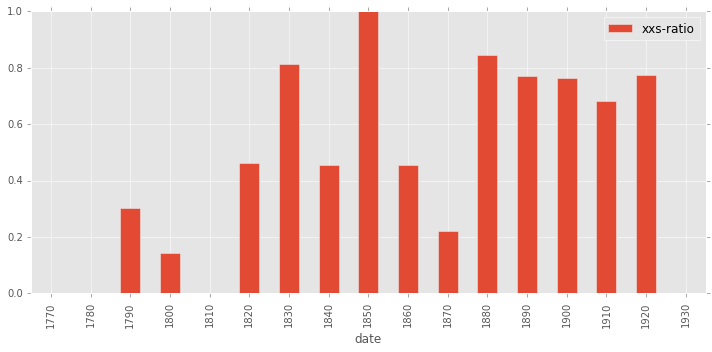

In [91]:
plotGroup(dfb, ['xxs-ratio'], 10, save=True, filename='xxs-decade')

/usr/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


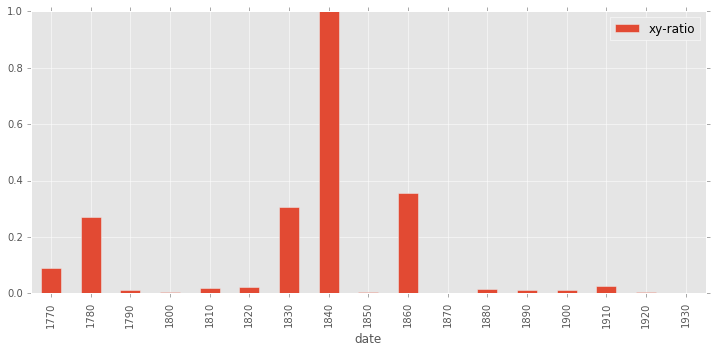

In [115]:
plotGroup(df, ['xy-ratio'], 10)

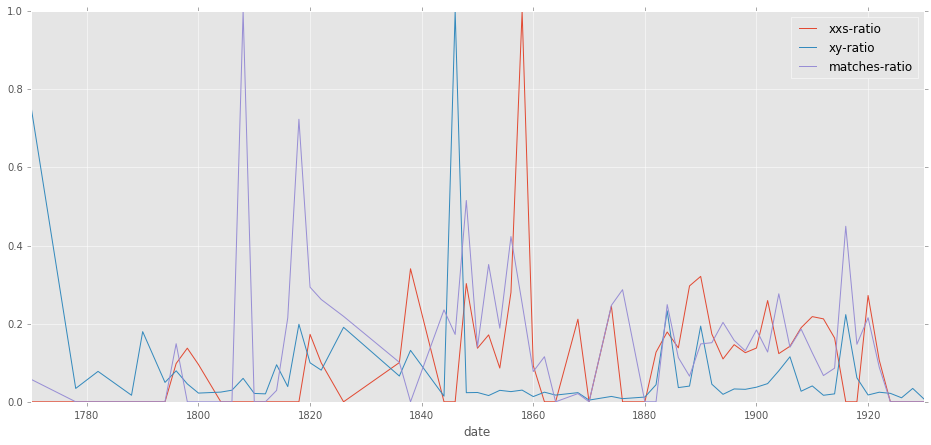

In [19]:
plotGroup(dfb)

/usr/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


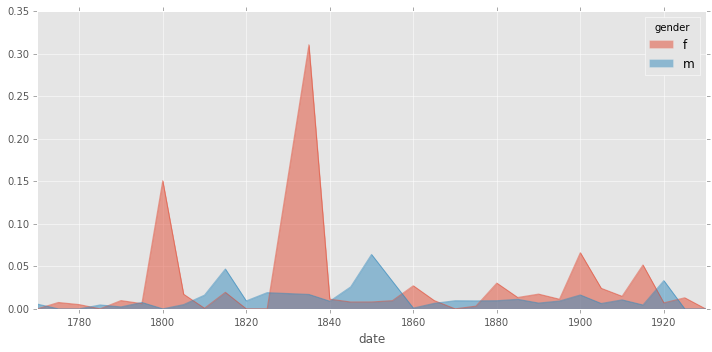

In [183]:
g = df.groupby(['gender', (df.index//5)*5]).mean()['clas-ratio']
g = g.unstack(level=0).fillna(0).plot(kind='area', stacked=False)

In [244]:
def plotDemographics(df, column, demographic, smoothing, save=False, filename=False): 
    grouped = df.groupby([demographic, (df.index//smoothing)*smoothing]).mean()
    normalize(grouped)
    grouped = grouped[column].unstack(level=0).fillna(0)
    ax = grouped.plot(kind='area', stacked=False)
    if save: 
        fig = ax.get_figure()
        filename = 'charts/' + filename + '.png'
        fig.savefig(filename)

/usr/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


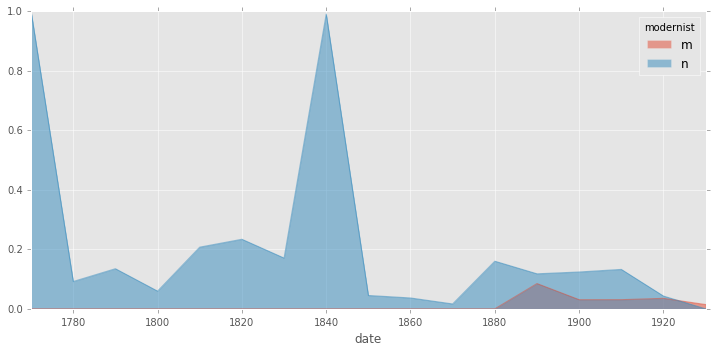

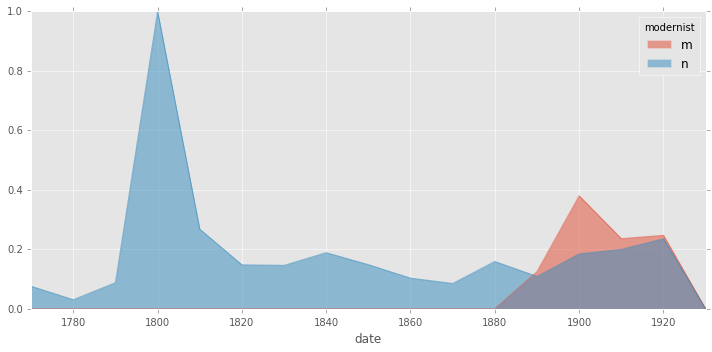

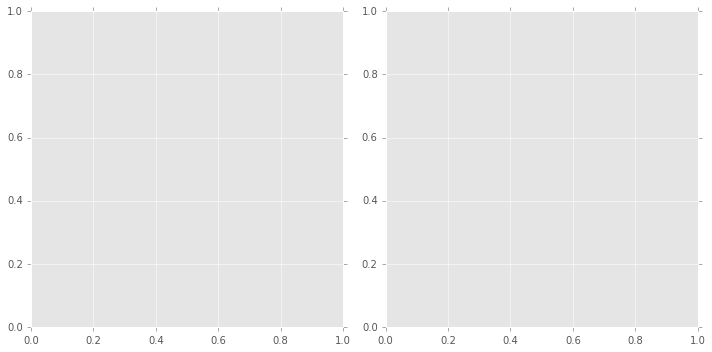

In [254]:
mb = plotDemographics(dfb, 'biblical', 'modernist', 10)
mc = plotDemographics(dfb, 'clas-ratio', 'modernist', 10)

/usr/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


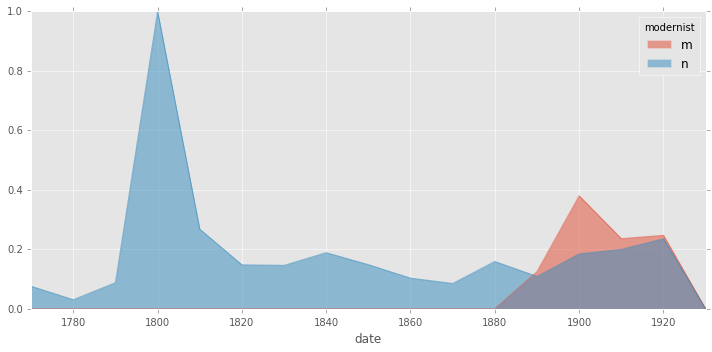

In [243]:
plotDemographics(dfb, 'clas-ratio', 'modernist', 10, save=True, filename='classical-modernist-dfb-10')

In [ ]:
# Old
dg = df.groupby(['gender'])
f, m = dg.get_group('f'), dg.get_group('m')
fdf, mdf = pd.DataFrame(f), pd.DataFrame(m)

dn = df.groupby(['nationality'])
a, b, c = dn.get_group('a'), dn.get_group('b'), dn.get_group('c')
adf, bdf, cdf = pd.DataFrame(a), pd.DataFrame(b), pd.DataFrame(c)

a, b, c = a.groupby('groupdate').mean(), b.groupby('groupdate').mean(), c.groupby('groupdate').mean()

f = f.groupby('groupdate').mean()
m = m.groupby('groupdate').mean()

def plotMF(m, f, column): 
    fig = plt.figure()
    plt.hold(True)
    female = f[column].plot(label='f')
    male = m[column].plot(label='m')
    plt.legend()

def plotABC(a, b, c, column): 
    fig = plt.figure()
    plt.hold(True)
    am = m[column].plot(label='American')
    brit = f[column].plot(label='British')
    can = c[column].plot(label='Canadian')
    plt.legend()